In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

from sklearn.tree import export_graphviz
from subprocess import call

In [42]:
titanic_df = pd.read_csv("titanic.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [43]:
titanic_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [44]:
# You can also drop whichever other columns you'd like here
titanic_df.drop("Cabin", axis=1, inplace=True)
titanic_df.drop("PassengerId", axis=1, inplace=True)
titanic_df.drop("Name", axis=1, inplace=True)
titanic_df.drop("Ticket", axis=1, inplace=True)

### One-Hot Encoding
One-hot encoding is a technique used to ensure that categorical variables are better represented in the machine. Let's take a look at the "Sex" column

In [45]:
titanic_df["Sex"].unique()
titanic_df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

Machine Learning classifiers don't know how to handle strings. As a result, you need to convert it into a categorical representation. There are two main ways to go about this:

Label Encoding: Assigning, for example, 0 for "male" and 1 for "female". The problem here is it intrinsically makes one category "larger than" the other category.

One-hot encoding: Assigning, for example, [1, 0] for "male" and [0, 1] for female. In this case, you have an array of size (n_categories,) and you represent a 1 in the correct index, and 0 elsewhere. In Pandas, this would show as extra columns. For example, rather than having a "Sex" column, it would be a "Sex_male" and "Sex_female" column. Then, if the person is male, it would simply show as a 1 in the "Sex_male" column and a 0 in the "Sex_female" column.

There is a nice and easy method that does this in pandas: get_dummies()

In [46]:
titanic_df = pd.get_dummies(titanic_df, prefix="Sex", columns=["Sex"])
titanic_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,S,False,True
1,1,1,38.0,1,0,71.2833,C,True,False
2,1,3,26.0,0,0,7.9250,S,True,False
3,1,1,35.0,1,0,53.1000,S,True,False
4,0,3,35.0,0,0,8.0500,S,False,True


Now, we do the same to the "Embarked" column.

In [47]:
titanic_df = pd.get_dummies(titanic_df, prefix="Embarked", columns=["Embarked"])
titanic_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,False,True,False,False,True
1,1,1,38.0,1,0,71.2833,True,False,True,False,False
2,1,3,26.0,0,0,7.9250,True,False,False,False,True
3,1,1,35.0,1,0,53.1000,True,False,False,False,True
4,0,3,35.0,0,0,8.0500,False,True,False,False,True


Define independent and dependent variables before training and testing split

In [48]:
# define dependent variable
X = titanic_df.drop(columns='Survived')
y = titanic_df['Survived']

# define independent variables
X = titanic_df[['Pclass','Sex_female', 'Sex_male', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S']]

In [49]:
X.shape

(891, 10)

### Train Test Split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Decision Tree Classifier

In [51]:
# create decision tree classifier object
# train a model without pruning 
unpruned = DecisionTreeClassifier(random_state=42)

# train decision tree classifer
unpruned.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [52]:
# predict the repsonse for test dataset
y_train_pred = unpruned.predict(X_train)
y_test_pred = unpruned.predict(X_test)

# model accuarcy and confusion matrix
print(f'Training Accuracy: {accuracy_score(y_train, y_train_pred)}')
print(f'Testing Accuracy without pruning: {accuracy_score(y_test, y_test_pred)}')
print("At depth:", unpruned.tree_.max_depth)

Training Accuracy: 0.9789325842696629
Testing Accuracy without pruning: 0.8156424581005587
At depth: 21


### Tree Plot

<function matplotlib.pyplot.show(close=None, block=None)>

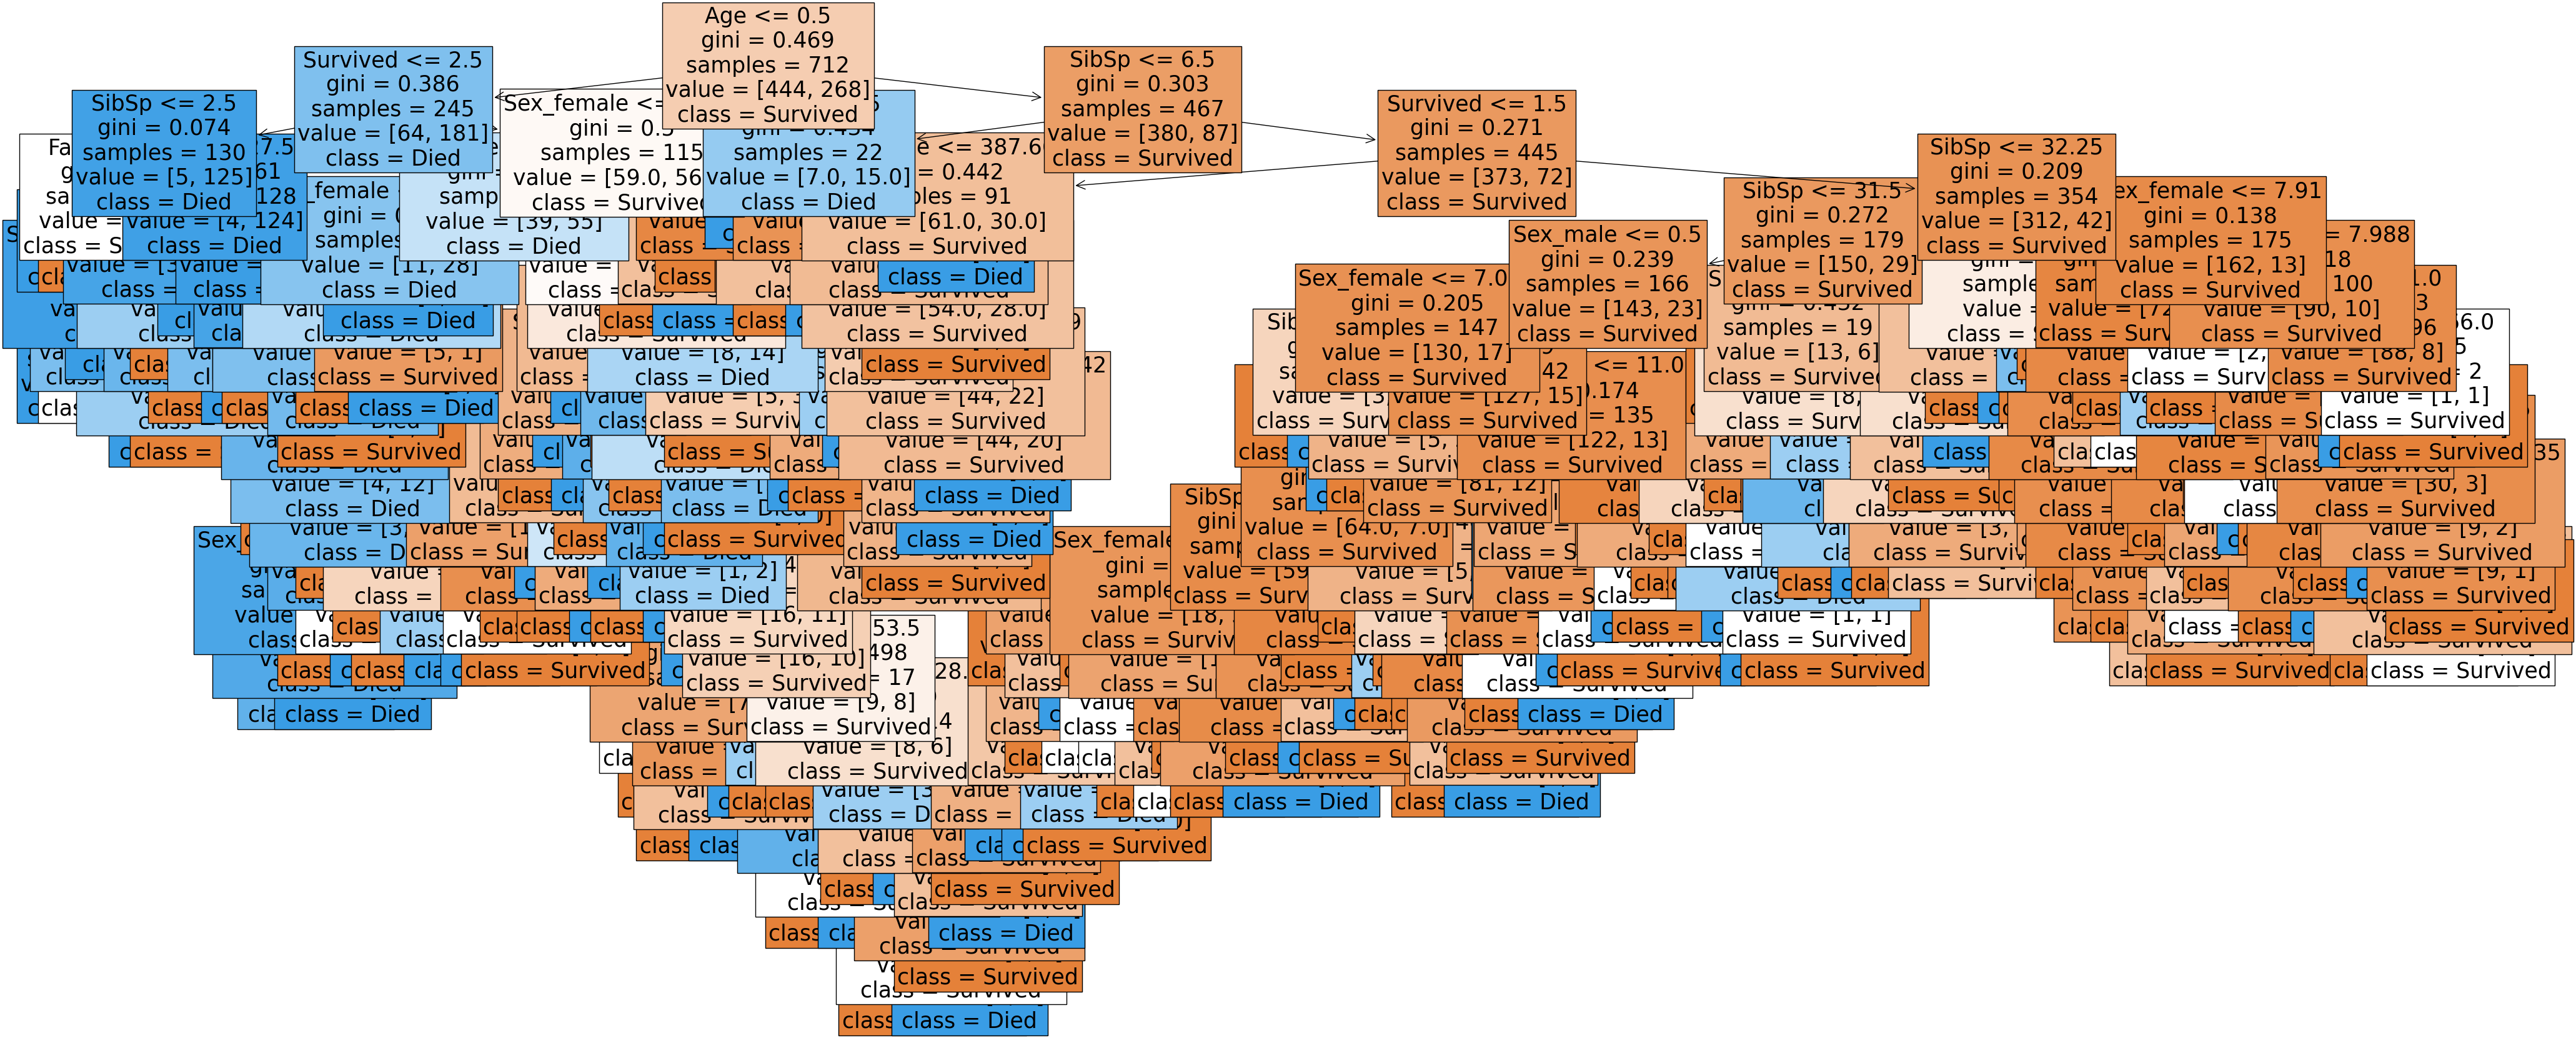

In [53]:
plt.figure(figsize=(50,20))
features = titanic_df.columns
classes = ['Survived', 'Died']
tree.plot_tree(unpruned,feature_names=features,class_names=classes,filled=True,fontsize=25)
plt.show

### Pre-Pruning 

Check the accuracy values with respect to maximum depth of the decision tree

Text(0, 0.5, 'Accuracy')

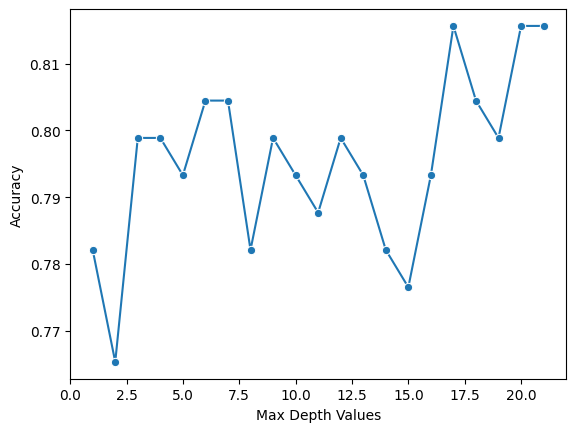

In [54]:
pruned_depths = range(1,unpruned.tree_.max_depth+1)

pruned_scores = []
for d in pruned_depths:
    clf = DecisionTreeClassifier(max_depth=d, random_state=1)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    pruned_scores.append(score)

sns.lineplot(x=pruned_depths,y=pruned_scores, marker="o")
plt.xlabel("Max Depth Values")
plt.ylabel("Accuracy")




In [55]:
# fit the chosen tree
r = 42
best_depth = pruned_depths[np.argmax(pruned_scores)]
print('Best performance reached at depth of:' , best_depth)

# pruned = DecisionTreeClassifier(max_depth=best_depth,random_state=r)
pruned = DecisionTreeClassifier(criterion="entropy", max_depth=best_depth,random_state=r,min_samples_leaf=2)

# train decision tree classifier
pruned.fit(X_train,y_train)

# predict the response for test dataset
y_test_pred = pruned.predict(X_test)

# model accuracy, how often is the classifier correct
print("Training Accuracy:",accuracy_score(y_train, y_train_pred))
print("Testing Accuracy:",accuracy_score(y_train, y_train_pred))


Best performance reached at depth of: 17
Training Accuracy: 0.9789325842696629
Testing Accuracy: 0.9789325842696629
